In [2]:
#Classification problem
#pandas, numpy, matplotlib, seaborn, plotly
#sql typically has data as rows and columns
#data collection from sql database: establish sql connection and run sql query to extract table
#we will use sql3 to establish sql connection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
import sqlite3

In [4]:
connection = sqlite3.connect("password_data.sqlite")

In [5]:
data = pd.read_sql("SELECT * FROM Users", connection)

In [6]:
data.shape # 100000 rows, 3 columns

(100000, 3)

In [7]:
data.columns
#index is an irrelevant column, so we will drop it

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(['index'], axis = 1, inplace = True)

In [9]:
#Now we will check for duplicacy in the data
data.duplicated().sum() #since sum is 0, there are no duplicate instances

0

In [10]:
#Now we will check for missing data
data.isnull().any() #no missing data for both password and strength features

password    False
strength    False
dtype: bool

In [11]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [12]:
data.dtypes #object in pandas ~ string in pandas

password    object
strength     int64
dtype: object

In [13]:
#Checking for instances where strength is negative (because of dtype being int64, which can be signed). If strength is negative,
#we will delete those instances
data['strength'].unique() # so we have strengths of either 0, 1, or 2. So we will not delete any instances.

array([1, 2, 0], dtype=int64)

In [14]:
#Perform semantic analysis on the data:
#how many passwords hold only numeric characters?
#how many passwords hold only upper case characters?
#how many passwords hold only alpha-numeric characters?
#how many passwords hold only title case characters?
#how many passwords hold some special characters?

In [15]:
type(data['password'][0]) #string character, so we will need to use string operations using pandas

str

In [16]:
data['password'].str.isnumeric() #is this numeric? if false, it is not numeric

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [17]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [18]:
data[data['password'].str.isnumeric()].shape # only 26 passwords with only numeric characters


(26, 2)

In [19]:
#upper case characters? we can use isupper() function
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [20]:
data[data['password'].str.isupper()].shape #1506 passwords with upper case characters

(1506, 2)

In [21]:
#alpha numeric characters? we can use isalnum() function
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [22]:
data[data['password'].str.isalnum()].shape
#97203 passwords with alpha numeric characters

(97203, 2)

In [23]:
#title-case characters? we can use istitle() function
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [24]:
data[data['password'].str.istitle()].shape
#932 passwords with title case characters

(932, 2)

In [25]:
#only alphabet characters?
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [26]:
data[data['password'].str.isalpha()].shape
#50 passwords with only numeric characters

(50, 2)

In [27]:
import string 

In [28]:
string.punctuation #these are all your special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def special(row):
    for char in row:
        if char in string.punctuation:
            return 1
        pass

In [30]:
data[data["password"].apply(special) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [31]:
data[data["password"].apply(special) == 1].shape
#2663 passwords with special characters

(2663, 2)

In [32]:
#Applying feature engineering

In [33]:
data['length'] = data['password'].str.len() #get length of each password and store it in a feature called 'length'

In [34]:
data

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8
...,...,...,...
99995,obejofi215,1,10
99996,fmiopvxb64,1,10
99997,czvrbun38,1,9
99998,mymyxe430,1,9


In [35]:
#get frequency of lower case in each row
def lower(row):
    return len([char for char in row if char.islower()])/len(row)

In [36]:
#get frequency of upper case in each row
def upper(row):
    return len([char for char in row if char.isupper()])/len(row)

In [37]:
#get frequency of numbers in each row
def number(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [38]:
def special(row):
    special_char = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_char.append(row)
    return len(special_char)/len(row)

In [39]:
data['lower_frequency'] = np.round(data['password'].apply(lower), 3)
data['upper_frequency'] = np.round(data['password'].apply(upper), 3)
data['digit_frequency'] = np.round(data['password'].apply(number), 3)
data['sp_char_frequency'] = np.round(data['password'].apply(special),3)

In [40]:
data

,password,strength,length,lower_frequency,upper_frequency,digit_frequency,sp_char_frequency
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000


In [41]:
data.columns

Index(['password', 'strength', 'length', 'lower_frequency', 'upper_frequency',
       'digit_frequency', 'sp_char_frequency'],
      dtype='object')

In [42]:
columns = ['length', 'lower_frequency', 'upper_frequency',
       'digit_frequency', 'sp_char_frequency']
for col in columns:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg(['min','max', 'mean','median'])) #checking the strength of password 
    #based on columns 'length', 'lower_frequency', 'upper_frequency', 'digit_frequency', 'sp_char_frequency'
    #we can showcase this using a boxplot to show the 25th, 50th, 75th percentile and whiskers

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
lower_frequency
         lower_frequency                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.708050  0.714
1                    0.0  0.923  0.630067  0.667
2                    0.0  0.917  0.424679  0.400
upper_frequency
         upper_frequency                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.012872  0.000
1                    0.0  0.923  0.007915  0.000
2                    0.0  0.889  0.367633  0.429
digit_frequency
         digit_frequency                        
                     min    max      mean median
strength                 

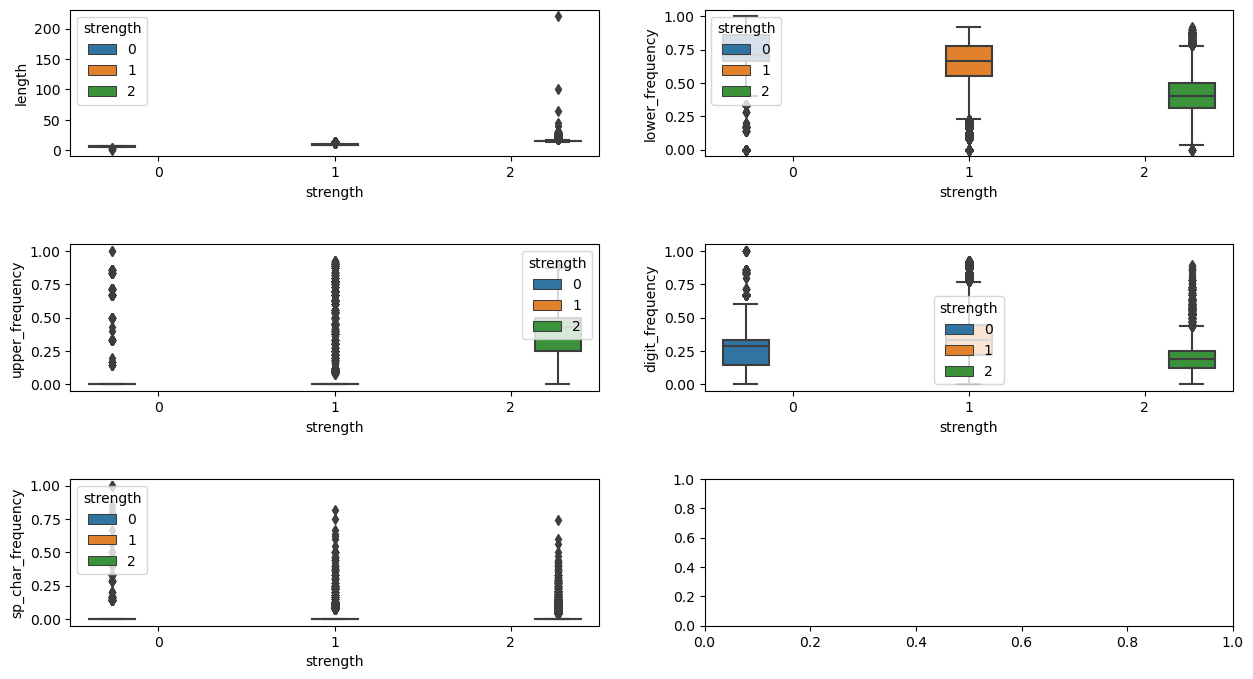

In [43]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = mlt.subplots(3, 2, figsize = (15,8))
sns.boxplot(x = 'strength', y = 'length', hue = 'strength', ax = ax1, data = data)
sns.boxplot(x = 'strength', y = 'lower_frequency', hue = 'strength', ax = ax2, data = data)
sns.boxplot(x = 'strength', y = 'upper_frequency', hue = 'strength', ax = ax3, data = data)
sns.boxplot(x = 'strength', y = 'digit_frequency', hue = 'strength', ax = ax4, data = data)
sns.boxplot(x = 'strength', y = 'sp_char_frequency', hue = 'strength', ax = ax5, data = data)
#manage horixontal space between boxplots: use mlt.subplots_adjust()
mlt.subplots_adjust(hspace = 0.6)

In [44]:
#Applying feature importance so that the ML algo works efficiently. We will use univariate analysis to determine what our important
#features are
#pick distribution and violin plots to understand the behavior of the data: how are the data points in the length feature distributed?
#violin plot: combo of boxplot and distribution plot
def get_dist(data, feature):
    mlt.figure(figsize= (10,8))
    mlt.subplot(1, 2, 1)
    sns.violinplot(x = 'strength', y = feature, data = data)
    mlt.subplot(1,2,2)
    sns.distplot(data[data['strength'] == 0][feature], color = 'red', label = '0', hist = False)
    sns.distplot(data[data['strength'] == 1][feature], color = 'blue', label = '1', hist = False)
    sns.distplot(data[data['strength'] == 2][feature], color = 'green', label = '2', hist = False)
    mlt.legend()
    mlt.show()


In [45]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

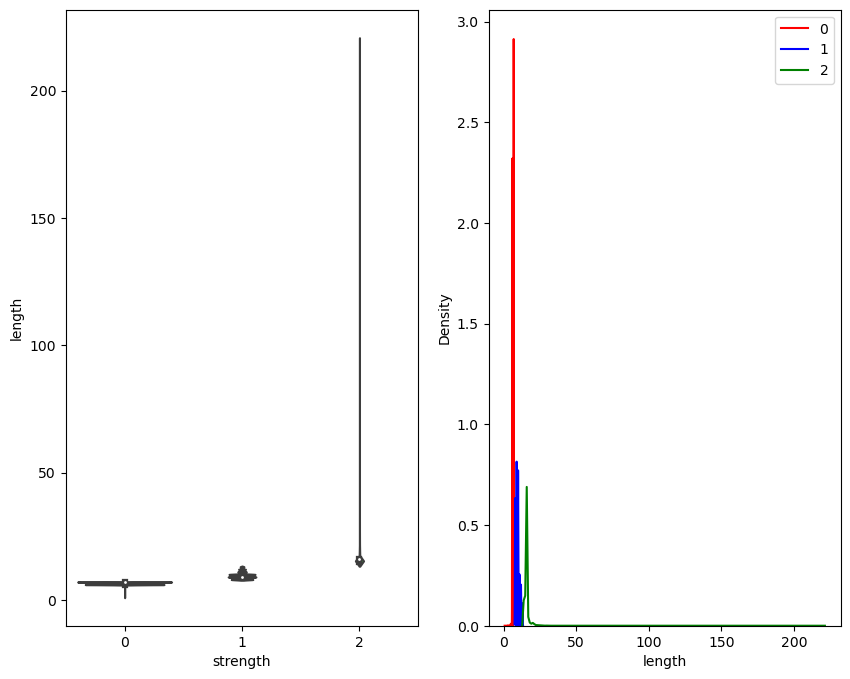

In [46]:
columns = ['length', 'lower_frequency', 'upper_frequency',
       'digit_frequency', 'sp_char_frequency']
get_dist(data, 'length')
    #from first violin plot on length, we have higher length of password for strength 2, so length is an interesting feature for ML algo
    #special character: violin plot is unable to make any valuable insight, so can we make this violin plot bigger in size?
    #higher overlapping in dist plot indicates greater ambiguity in feature space, making these features quite redundant/not 
    #very helpful in the ML algo

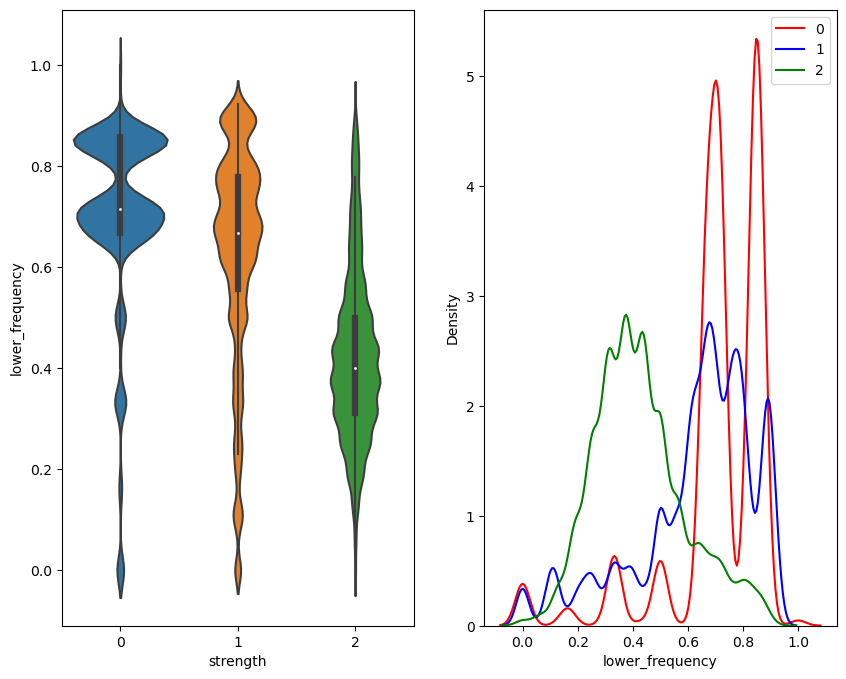

In [47]:
get_dist(data, 'lower_frequency')

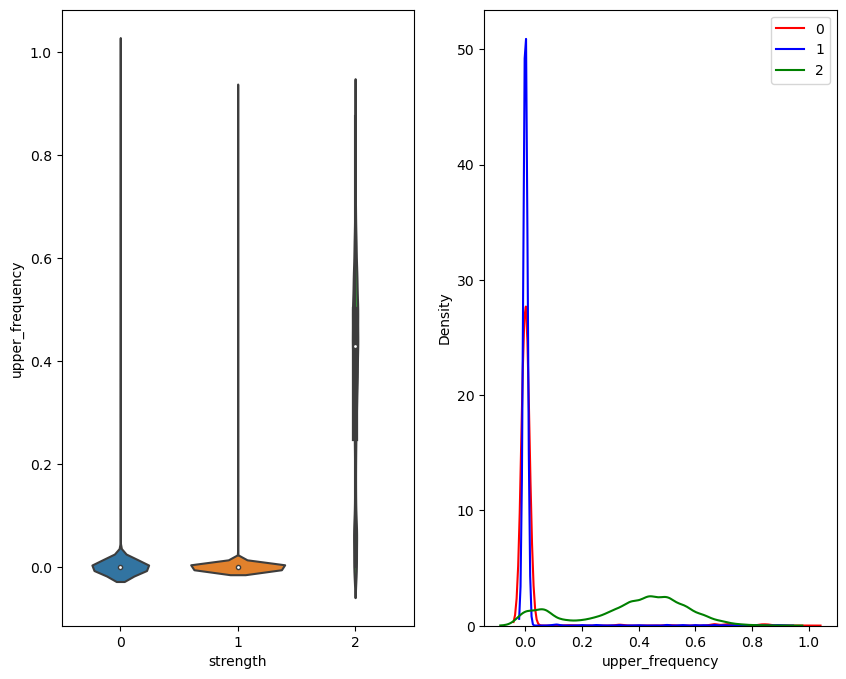

In [48]:
get_dist(data, 'upper_frequency')
#lots of overlapping in dist plot, so not very helpful in the ML algo

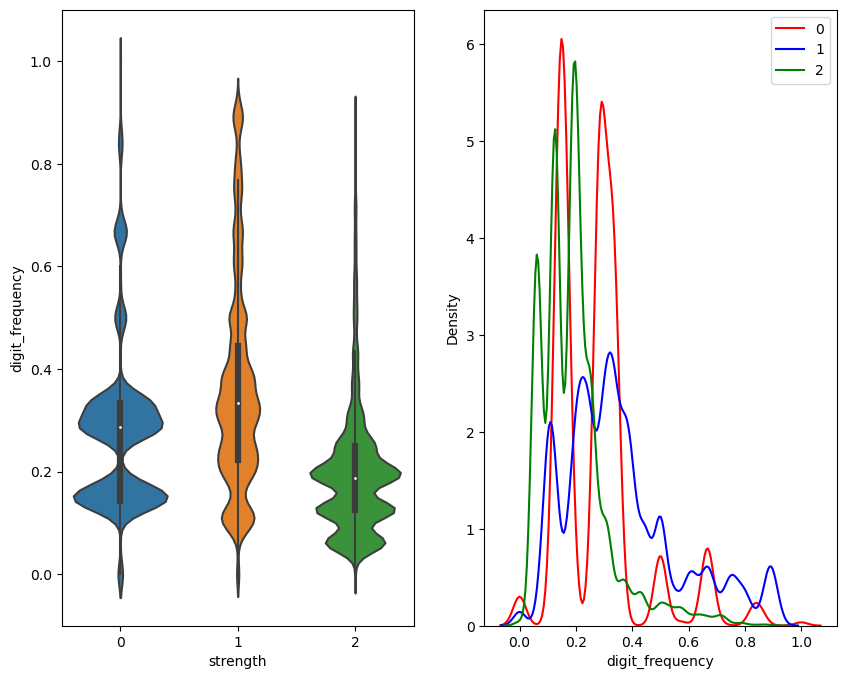

In [49]:
get_dist(data, 'digit_frequency')
#lots of overlapping in dist plot, so not very helpful in the ML algo

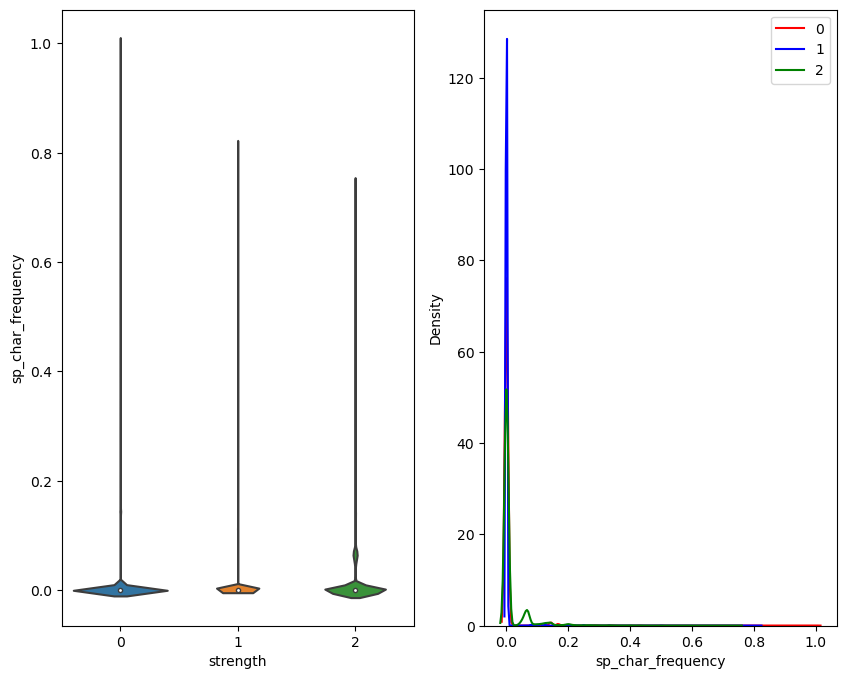

In [50]:
get_dist(data, 'sp_char_frequency')
#lower count of special character is good for strength
#lots of overlapping in dist plot, so not very helpful in the ML algo

In [51]:
#Apply NLP Techniques on the data in feature engineering
#Always good to shuffle data for the robustness of the ML model
new_data = data.sample(frac = 1) #fraction of the axis items to return

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(analyzer = 'char')

In [54]:
x = list(new_data['password'])

In [55]:
X = vectorizer.fit_transform(list(new_data['password']))

In [56]:
X.shape #every password is represented using 99 dimensions now. number of dimensions could change because we are shuffling the 
#data

(100000, 99)

In [57]:
X #sparse matrix has most values as 0 in the matrix

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [58]:
X.toarray() #array representation of X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X.toarray()[0] #vector representation of the very first password in the dataframe

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19473784, 0.45060448, 0.        , 0.27861815,
       0.        , 0.29556251, 0.        , 0.28508251, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18753953, 0.        , 0.        ,
       0.        , 0.21969432, 0.34276615, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.24108898, 0.23044236, 0.        , 0.        , 0.24981517,
       0.25550738, 0.        , 0.27005729, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
len(vectorizer.get_feature_names_out()) #this means that we have 99 characters for which the TF-IDF scores are evaluated

99

In [61]:
characters = vectorizer.get_feature_names_out() #these are all the characters we have

In [62]:
df2 = pd.DataFrame(X.toarray(), columns = characters)
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
#length and lower_frequency are important features to consider to determine strength of password
#Applying machine learning algorithm on the data
new_data.columns

Index(['password', 'strength', 'length', 'lower_frequency', 'upper_frequency',
       'digit_frequency', 'sp_char_frequency'],
      dtype='object')

In [71]:
df2['length'] = new_data['length']
df2['lower_frequency'] = new_data['lower_frequency']

In [73]:
#Applying machine learning algorithms on the data
#Here, since we need to predict the strength of the password, it is the dependent feature. the rest of the features are 
#independent features. So, X = strength; the others will be Y or y.
#Training data is used to train the ML algorithm so that it can learn the relationships from the data and do predictions from the testing data.
#Then we can use the testing data to evaluate the performance of the ML algorithm.
#y_pred are all the predictions made on the testing data (X_test)
#Here, df2 is X, y is new_data['strength']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, new_data['strength'], test_size = 0.2)

In [76]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lower_frequency
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [78]:
X_train.shape

(80000, 101)

In [79]:
y_train.shape

(80000,)

In [80]:
#ML is divided into 3 parts: regression, classification, clustering
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = "multinomial") #multinomial is used when we have more than two classes in the dependent feature. since we have 3 labels here: 0, 1, 2, we will store as multinomial
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
y_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
from collections import Counter
Counter(y_pred)
#There are about 17k which have normal strength, 2k with high strength, 1k with low strength

Counter({1: 17130, 2: 1708, 0: 1162})

In [83]:
#Doing prediction on some sample/user entered password
#an example: 
password = "%@123abcd"
sample_array = np.array([password])
sample_matrix = vectorizer.transform(sample_array)
sample_matrix.toarray().shape

(1, 99)

In [84]:
len(password)

9

In [85]:
len([char for char in password if char.islower()])/len(password)
        

0.4444444444444444

In [86]:
new_matrix = np.append(sample_matrix.toarray(), (9, 0.44)).reshape(1,101)

In [87]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [88]:
#Now, writing a function to automate the above for all passwords in the password feature
def predict():
    password = input("Enter a password: ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    len_pass = len(password)
    len_lower = len([char for char in password if char.islower()])
    len_normalized = len_lower/len_pass
    updated_matrix = np.append(sample_matrix.toarray(), (len_pass, len_normalized)).reshape(1,101)
    result = clf.predict(updated_matrix)
    if result == 0:
        return "Password is weak!"
    if result == 1:
        return "Password is normal!"
    if result == 2:
        return "Password is strong!"

In [91]:
predict()

Enter a password: 1234fickle#!AZ


'Password is normal!'

In [207]:
#Checking accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [209]:
accuracy_score(y_test, y_pred) #accuracy is 80%

0.8028

In [210]:
confusion_matrix(y_test, y_pred) #total 704 data points for which the real strength is 0 and the model
#also has predicted 0. 13974 means actual strength is 1 for those data points and model has also
#predicted 1. 1378 data points have actual strength as 2 and model has also predicted 2.

array([[  704,  1951,     0],
       [  600, 13974,   255],
       [   75,  1063,  1378]], dtype=int64)

In [212]:
print(classification_report(y_test, y_pred)) #various classification values for each strength value

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      2655
           1       0.82      0.94      0.88     14829
           2       0.84      0.55      0.66      2516

    accuracy                           0.80     20000
   macro avg       0.73      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

